# **Exploring How Age, Cholesterol and Resting Blood Pressure Can Classify Heart Disease Patients from Cleveland**  

# Introduction

In [ ]:
This project proposal investigates and analyzes the 1988 UC Irvine Machine Repository dataset on Heart Disease from the Cleveland database. The aim of the dataset was to determine the presence of heart disease in patients and see how various factors contribute to Heart Disease. 
The term Heart Disease encompasses a range of conditions that affect the heart (reference). Coronary Heart Disease is one type that affects the blood supply to the heart, which, through excess cholesterol buildup or plaque, constricts proper blood flow to the heart and can subsequently lead to a heart attack, stroke, or chest pain (reference). Age and blood pressure are also risk factors to take into account in developing this disease (reference). 
This project will investigate how the age, cholesterol (“chol”) and the resting blood pressure of patients when admitted to the hospital (“trestbps”) predictors can associate a link to heart disease (“num”) presence.


# Preliminary Exploratory Data Analysis

In [ ]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
options(repr.matrix.max.rows = 10)

In [4]:
# read the dataset and write a short description.
cleveland_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)

#rename the columns
cleveland_data <- rename(cleveland_data, age = X1, sex = X2, cp = X3, trestbps = X4, chol = X5, fbs = X6, restecg = X7, thalach = X8, exang = X9, oldpeak = X10, slope = X11, ca = X12, thal = X13, num = X14)
cleveland_data

#select the relevant columns (age, chol, trestbps, num)
cleveland_selected <- select(cleveland_data, age, chol, trestbps, num) |> 
    arrange(age)

#wrangle the data, set num to either True/False
cleveland_wrangled <- cleveland_selected |>
    mutate(num = as_factor(num)) |>
    mutate(num = fct_recode(num, "False" = "0", "True" = "1", "True" = "2", "True" = "3", "True" = "4"))
cleveland_wrangled

#split dataset into training + testing
cleveland_split <- initial_split(cleveland_wrangled, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


age,chol,trestbps,num
<dbl>,<dbl>,<dbl>,<fct>
29,204,130,False
34,182,118,False
34,210,118,False
35,183,138,False
35,198,120,True
⋮,⋮,⋮,⋮
71,265,110,False
71,149,112,False
74,269,120,False


In [6]:
cleveland_summarize <- cleveland_train |>
    group_by(num) |>
    summarize(mean_age = mean(age, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE), mean_trestbps = mean(trestbps, na.rm = TRUE)
              )
cleveland_summarize

num,mean_age,mean_chol,mean_trestbps
<fct>,<dbl>,<dbl>,<dbl>
False,53.10569,245.9431,129.5447
True,56.34615,252.6346,135.7788


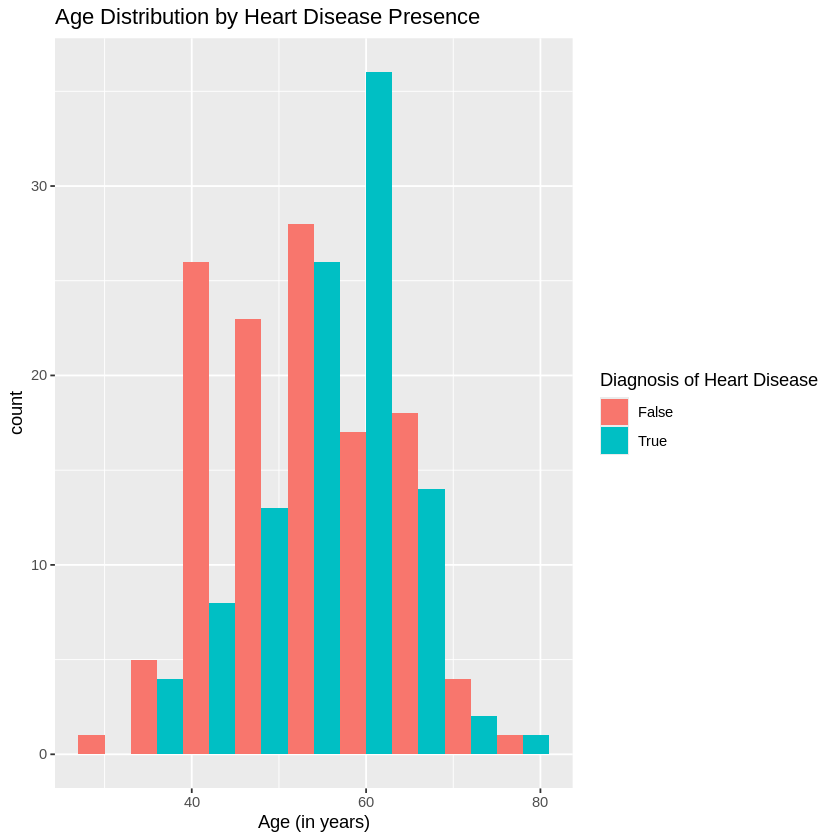

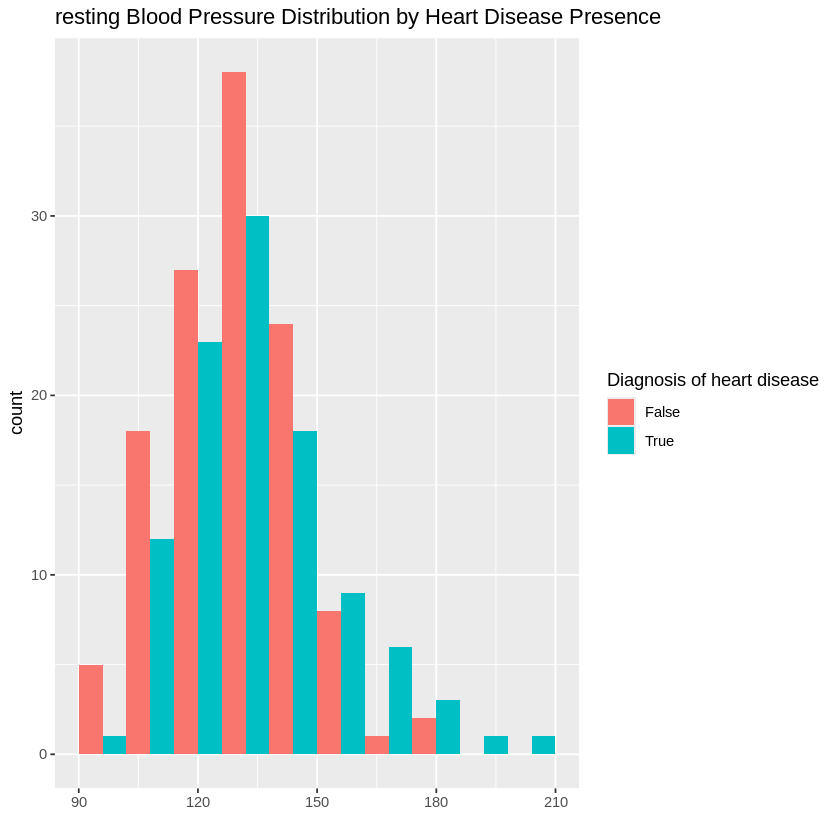

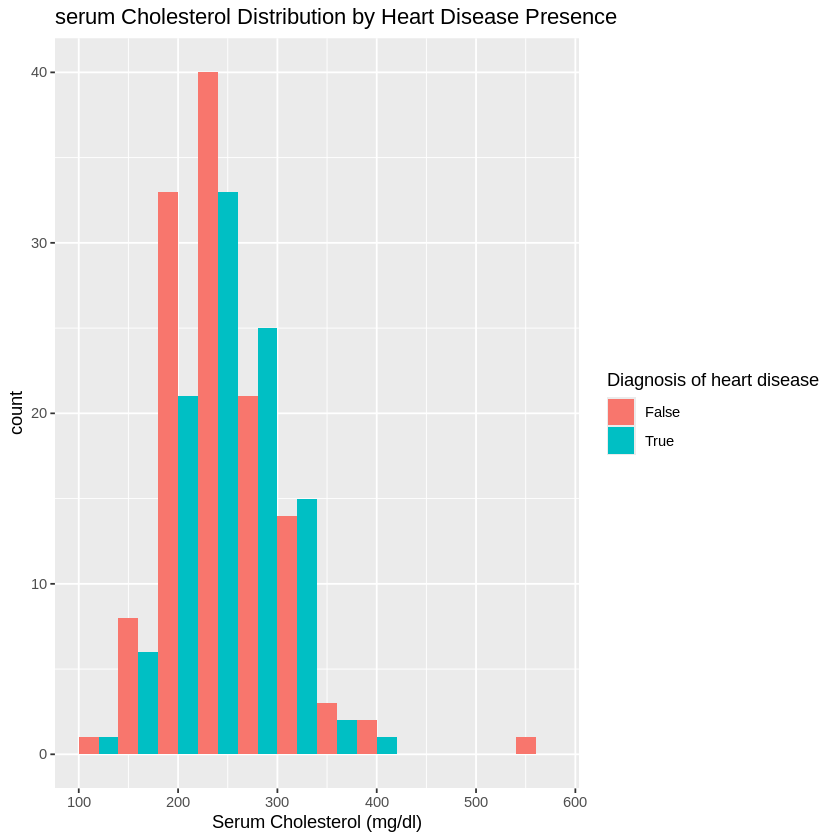

In [7]:
#plotting.
# plot 1: age + chol, plot 2: age + bp, plot 3: chol + bp
set.seed(1234)

cleveland_plot_1 <- ggplot(cleveland_train, aes(x = age, fill = as_factor(num))) + 
    geom_histogram(binwidth = 6, position = "dodge") +
    labs(x = "Age (in years)", fill = "Diagnosis of Heart Disease", 
        title = "Age Distribution by Heart Disease Presence")
cleveland_plot_1

cleveland_plot_2 <- ggplot(cleveland_train, aes(x = trestbps, fill = as_factor(num))) +
    geom_histogram(binwidth = 12, position = "dodge") +
    labs(x = "", fill = "Diagnosis of heart disease", 
         title = "resting Blood Pressure Distribution by Heart Disease Presence")
cleveland_plot_2

cleveland_plot_3 <- ggplot(cleveland_train, aes(x = chol, fill = as_factor(num))) +
    geom_histogram(binwidth = 40, position = "dodge") +
    labs(x = "Serum Cholesterol (mg/dl)", fill = "Diagnosis of heart disease", 
        title = "serum Cholesterol Distribution by Heart Disease Presence")
cleveland_plot_3

# Methods

In [ ]:
I used the processed.cleveland.data dataset from the Heart Disease database from 1988. The creators noted that the Cleveland database are commonly used by data scientists which influenced my decision to use this data. This dataset is used to predict if a patient based on a multitude of variables, will have heart disease. The columns in the dataset include:
1. Age (age) 
2. Sex (sex)
3. Chest Pain Type (cp)
4. Resting Blood Pressure in mm Hg on admission to the hospital (trestbps)
5. Cholesterol (chol)
6. Fasting Blood Pressure > 120 mg/dl (fbs)
7. Resting Electrocardiographic Results (restecg)
8. Maximum Heart Rate Achieved (thalach)
9. Exercise Induced Angina (exang)
10. ST depression induced by exercise relative to rest (oldpeak)
11. The slope of the peak exercise ST segment (slope)
12. Number of major vessels colored by fluoroscopy (ca) 
13. Maximum heart rate achieved (thalach)
14. Diagnosis of heart disease (num, 1-4 = heart disease presence, 0 = no presence) 

After reading in the data, I started off by renaming the columns to the column names listed above to easily refer to later in teh analysis. I then started cleaning by filtering all the rows with missing data (?) using the != operator to deselect those rows. I then used the “select” function to extract the relevant columns to my exploratory question and created a new dataframe, “cleveland_selected” which contained the following columns: age, chol, trestbps, and num where age, chol and trestbps are my predictors and num is the class label variable. As “num” was first classified as an “integer” due to the numerical range it used (0 - 4) to indicate heart disease presence, I decided to transform it to be a factor using the mutate, as_factor, and fct_recode functions to simplify diagnoses to be either “TRUE” (presence of heart disease” or “FALSE” (no presence of heart disease) thus turning num into a categorical, binary variable which sets up my data analysis for classification. 
I then trained and tested my data first by using intial_split() to split the original data set into 75% in the training set and 25% in the testing set and set the strata for num or the class label variable. I only used the training set for my analysis.


# Expected Outcomes and Significance

# References 